# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None    
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from pandas.api.types import is_string_dtype

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [10,5]

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

import random

In [5]:
df_credit = pd.read_excel('C:/Users/GLOBAL/Desktop/Great Learning Assignments/SLC/SLC-Mini-Question/GermanCredit.xlsx')
df_credit.sample(5)

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
767,0,1530,18
732,1,3368,15
967,0,1345,18
688,1,3049,18


In [6]:
df_credit.shape

(1000, 3)

In [7]:
df_credit.dtypes

Creditability               int64
CreditAmount                int64
DurationOfCreditInMonths    int64
dtype: object

In [8]:
df_credit.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

<AxesSubplot:>

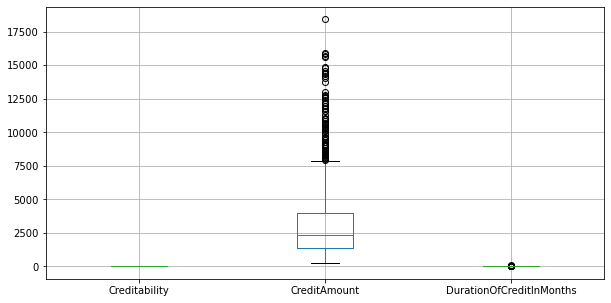

In [9]:
df_credit.boxplot()

In [10]:
df_credit['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [11]:
df_credit['CreditAmount'].nunique()

923

In [12]:
df_credit['DurationOfCreditInMonths'].nunique()

33

# 2. Check how many records do we have


In [13]:
df_credit.shape

(1000, 3)

We have `844` observations and `3` attributes.

# 3. Plot Histogram for column 'CreditAmount'

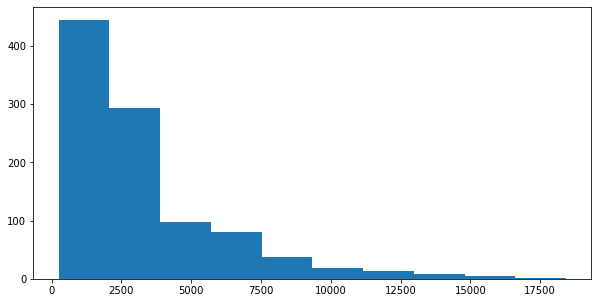

In [14]:
plt.hist(df_credit['CreditAmount'])
plt.show()

In [15]:
df_credit_0 = df_credit[df_credit['Creditability'] == 0]

In [16]:
df_credit_0.sample(5)

,Creditability,CreditAmount,DurationOfCreditInMonths
993,0,3966,18
784,0,2149,12
970,0,4844,48
158,0,6416,48
519,0,7127,36


In [17]:
df_credit_1 = df_credit[df_credit['Creditability'] == 1]

In [18]:
df_credit_1.sample(5)

,Creditability,CreditAmount,DurationOfCreditInMonths
639,1,2957,24
359,1,5045,15
553,1,894,10
283,1,2353,21
278,1,3660,24


In [19]:
df_new = pd.concat([df_credit_0, df_credit_1], axis = 0)

In [20]:
df_new.sample(5)

,Creditability,CreditAmount,DurationOfCreditInMonths
472,1,7409,36
653,1,2424,24
687,1,3990,36
368,1,1403,15
222,1,4679,24


# 3b. Create creditability dataframe

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

Text(1, 701, '700')

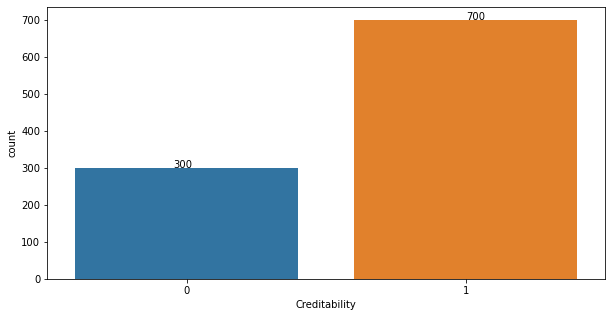

In [21]:
sns.countplot(df_credit['Creditability'])
plt.text(x = -0.05, y = df_credit['Creditability'].value_counts()[0] + 1, s = df_credit['Creditability'].value_counts()[0])
plt.text(x = 1, y = df_credit['Creditability'].value_counts()[1] + 1, s = df_credit['Creditability'].value_counts()[1])

# 6. Prepare input data for the model

In [22]:
df_credit.columns

Index(['Creditability', 'CreditAmount', 'DurationOfCreditInMonths'], dtype='object')

In [23]:
df_feature = df_credit.drop('Creditability', axis = 1)
df_feature.sample(5)

,CreditAmount,DurationOfCreditInMonths
633,3959,36
150,409,12
698,4576,45
14,1936,18
778,1245,18


In [24]:
df_target = df_credit['Creditability']
df_target.sample(5)

76     1
323    1
495    1
290    1
206    1
Name: Creditability, dtype: int64

In [25]:
y = pd.DataFrame(df_target)
y.sample(5)

,Creditability
753,0
924,0
741,1
592,0
550,1


In [26]:
X = df_feature.apply(lambda rec : rec - rec.mean() / rec.std(), axis = 0)
X = pd.DataFrame(X, columns = df_feature.columns)
X.sample(5)

,CreditAmount,DurationOfCreditInMonths
197,1815.841114,16.266579
323,2130.841114,8.266579
704,1167.841114,4.266579
63,10873.841114,34.266579
270,1234.841114,4.266579


In [27]:
X = sm.add_constant(X)
X.sample(5)

,const,CreditAmount,DurationOfCreditInMonths
973,1.000000,11814.841114,43.266579
905,1.000000,2122.841114,16.266579
478,1.000000,2746.841114,10.266579
684,1.000000,2212.841114,10.266579
275,1.000000,3445.841114,10.266579


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
print('X_train_shape:', X_train.shape)
print('X_test_shape:', X_test.shape)
print('y_train_shape:', y_train.shape)
print('y_test_shape:', y_test.shape)

X_train_shape: (700, 3)
X_test_shape: (300, 3)
y_train_shape: (700, 1)
y_test_shape: (300, 1)


# 7. Fit logistic regression model

In [29]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.584928
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 Apr 2022   Pseudo R-squ.:                 0.04055
Time:                        15:07:40   Log-Likelihood:                -409.45
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 3.052e-08
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6480      0.166      9.957      0.000       1.324

Fromthe output we can see that, the `CreditAmount` significantly affects the value of `Credibility` i.e. whether the customer will be able to pay the loan or not.

# 8. Test accuracy calculation

In [30]:
y_pred_prob = logreg.predict(X_test)
y_pred = [0 if x < 0.5 else 1 for x in y_pred_prob]
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6933333333333334


# 9. Build a confusion matrix

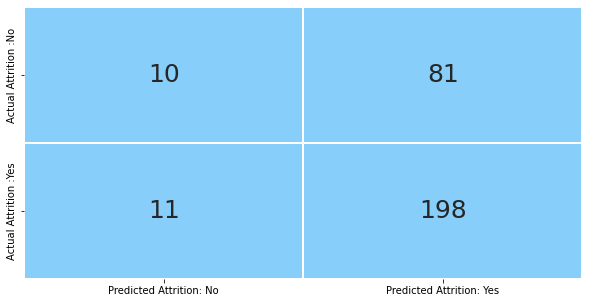

In [31]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

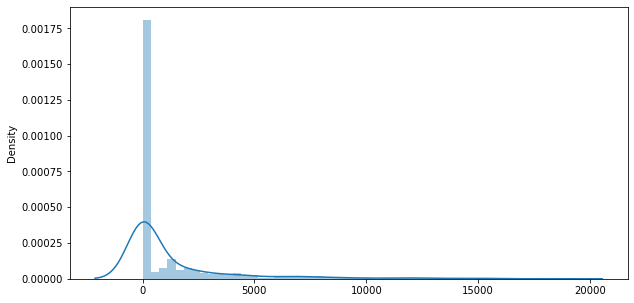

In [32]:
sns.distplot(df_credit_0)
plt.show()

In [33]:
df_credit_0.skew()

Creditability              0.000000
CreditAmount               1.583958
DurationOfCreditInMonths   0.835634
dtype: float64

In [34]:
df_credit_0_sqrt = np.sqrt(df_credit_0)
df_credit_0_sqrt.skew()

Creditability              0.000000
CreditAmount               0.876776
DurationOfCreditInMonths   0.353995
dtype: float64

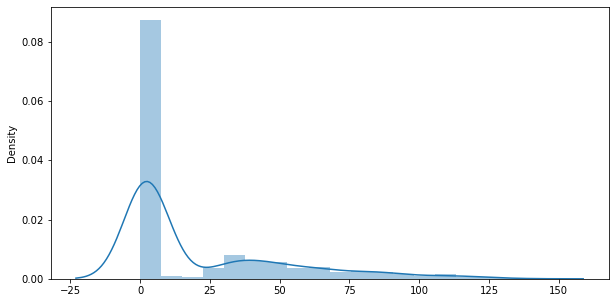

In [38]:
sns.distplot(df_credit_0_sqrt)
plt.show()

After applying the sqrt transformation, we can see that the skewness is reduced.

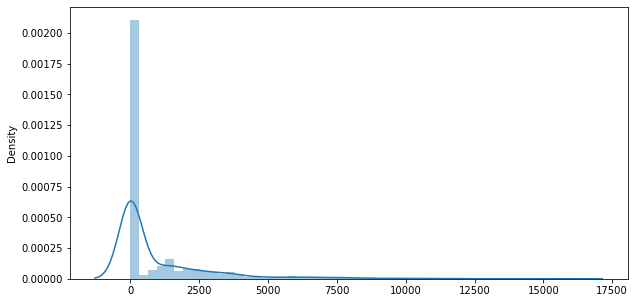

In [35]:
sns.distplot(df_credit_1)
plt.show()

In [36]:
df_credit_1.skew()

Creditability              0.000000
CreditAmount               1.950304
DurationOfCreditInMonths   1.188281
dtype: float64

In [37]:
df_credit_1_sqrt = np.sqrt(df_credit_1)
df_credit_1_sqrt.skew()

Creditability              0.000000
CreditAmount               0.990672
DurationOfCreditInMonths   0.532932
dtype: float64

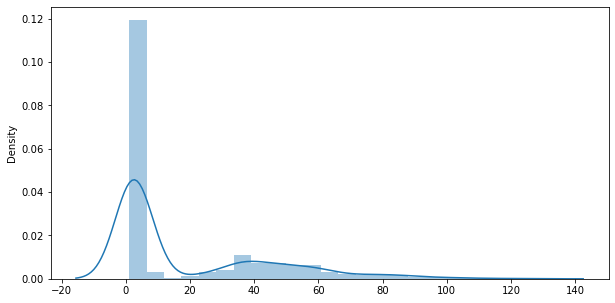

In [39]:
sns.distplot(df_credit_1_sqrt)
plt.show()

After applying the sqrt transformation, we can see that the skewness is reduced.